# 1. Data Exploration
Loading the Insurance Dataset to perform initial exploration

In [173]:
# Importing  necessary libraries for data exploration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the Dataset
df = pd.read_csv('insurance.csv')

#Displaying first 10 rows of the dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [174]:
# summary of the DataFrame to understand the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [175]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Assess relationships between variables using visualizations (such as scatter plots, scatterplot matrices, and correlation matrices).


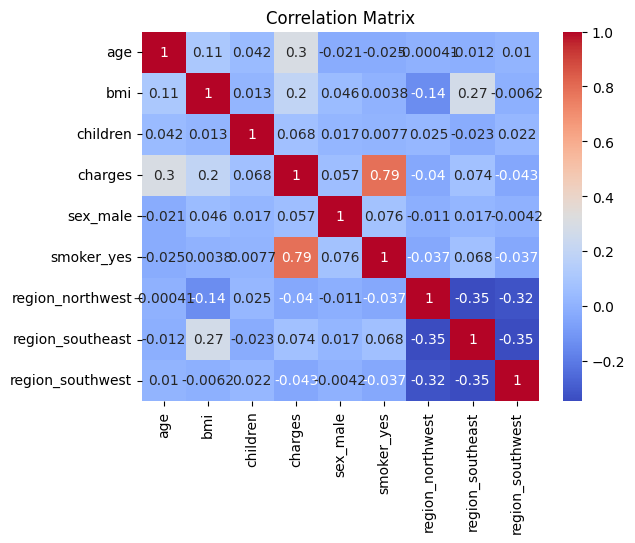

In [176]:
# Correlation matrix for numeric variables

# Convert categorical variables to numeric
df_encode = pd.get_dummies(df, drop_first=True) #creates binary columns for each category( sex_male, smoker_yes).

# Calculate the correlation matrix
correlation = df_encode.corr()  #function gives the Pearson correlation coefficient between every pair of numeric variables ranges from -1 to 1.

#Heatmap creation for corelation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')

#Title for corelation matrix
plt.title('Correlation Matrix')
plt.show()

Observations from corelation matrix:

*There is a high positive correlation between being a smoker (smoker_yes) and the charges i.e 0.79.
this says that smokers have high insurance charges.

*Moderate Positive Correlation between age and charges i.e 0.3.
This shows, as age increases the cost of insurance also increase.

*Moderate Positive Correlation between bmi and charges i.e 0.2.
people with higher BMI tend to have more medical charges.

*Negative Correlation between region_northwest and charges -0.27.
This suggests that  people in this region tend to have slightly lower healthcare costs.

*There are negative correlations between the different region variables (e.g., region_southeast vs. region_northwest),
which is expected due to one-hot encoding works.

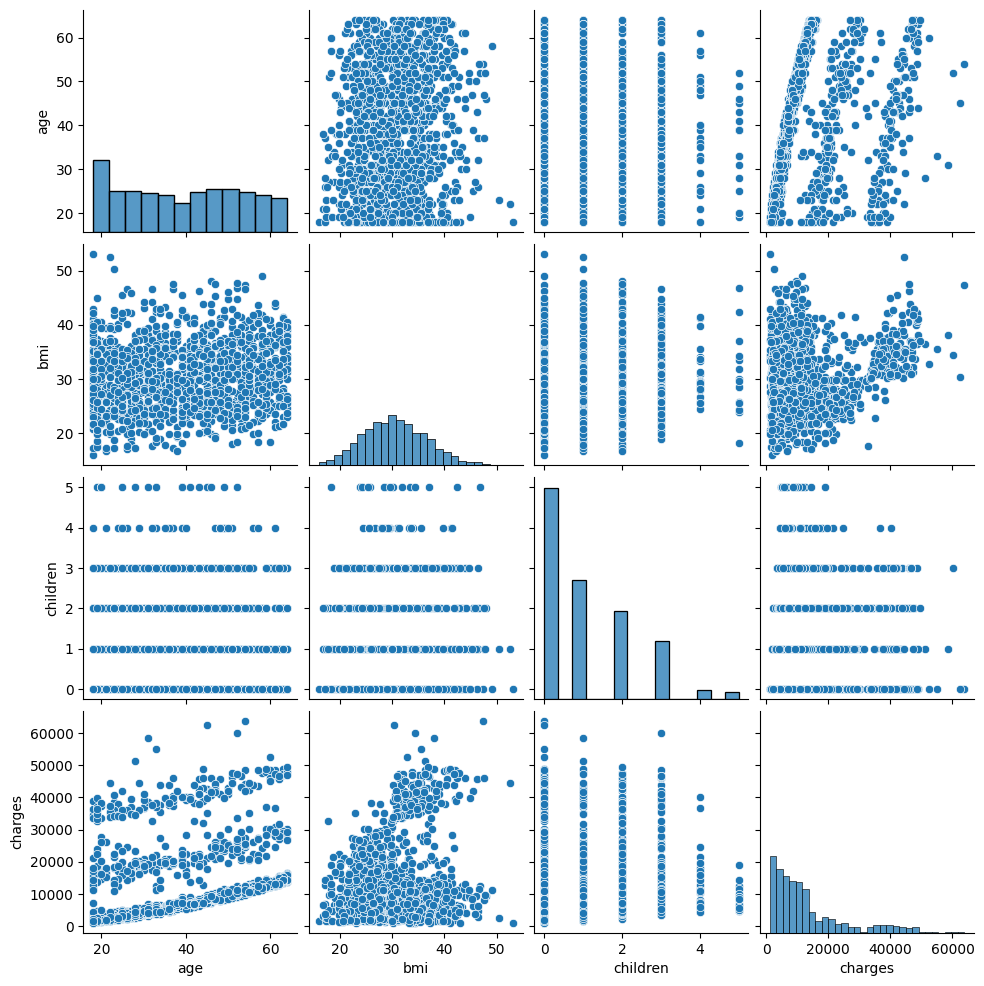

In [178]:
# Scatter plot matrix
sns.pairplot(df)
plt.show()


The above scatter plot visualizes relationships between different variables like age,bmi,children,charges in the dataset.

Main observations from the aove scatter plots are:
*People tend to charge more as they get older. This shows that the average cost of insurance is higher for older age.

*Higher BMI is linked to higher charges, although the relationship isn't as strong as age.
This could suggest that people with a higher BMI may have more health issues or costs.

*Age and BMI don't appear to be significantly correlated. The points are dispersed randomly, indicating that aging has no effect on BMI changes.

Hence,The scatter plot matrix suggests that age and BMI are important factors related to medical or insurance charges.

In [179]:
#checking for missing values in Dataset
missing_data_columns =  df.isnull().sum()
print(missing_data_columns)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


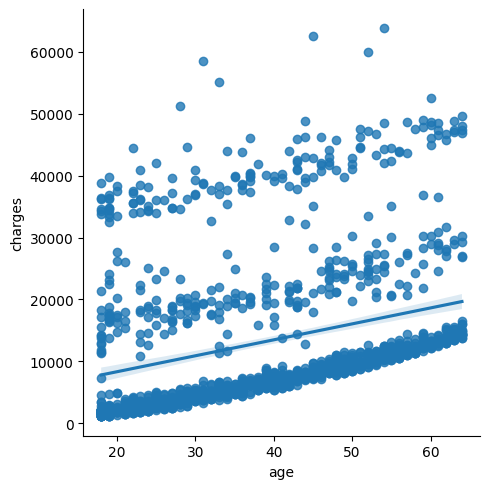

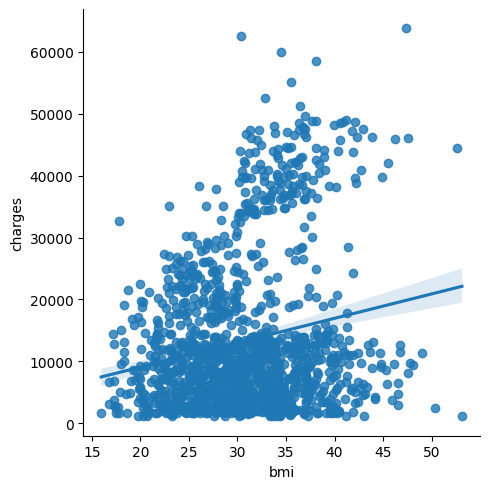

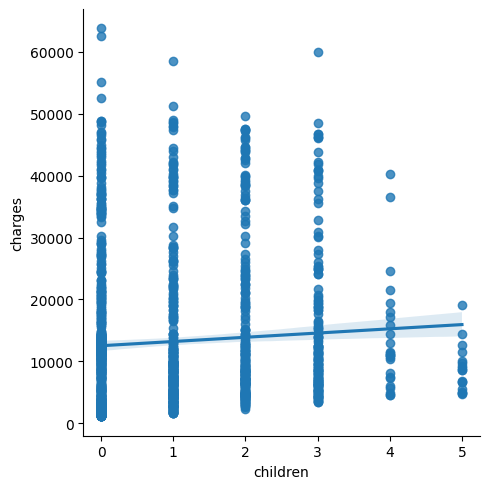

In [180]:
# relationships between features
sns.lmplot(x='age', y='charges', data=df)
sns.lmplot(x='bmi', y='charges', data=df)
sns.lmplot(x='children', y='charges', data=df)

*Age has a clear positive relationship with charges,older age people tend to have higher medical insurance costs.

*BMI shows a weak positive relationship with charges,people with higher BMI might face higher charges, but the correlation is not very strong.

*Children have a medium impact on charges, as there is no good relationship between the number of children and medical costs.

*These graphics support the idea that age and BMI, rather than the number of children, are more reliable indicators of healthcare or insurance expenses.

In [181]:
# Encoding categorical variables (like 'smoker' and 'region')
df = pd.get_dummies(df, drop_first=True)

# 2 K-Nearest Neighbors (KNN) Model Development 

In [182]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [183]:
# Splitting the data into features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
#80% of the data is used for training, and 20% is reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #The dataset is divided into two parts one for training the models (X_train, y_train) and one for testing (X_test, y_test). 


In [184]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This scaling ensures that features with larger numerical ranges like age or BMI don't dominate the model training. Both the training data (X_train_scaled) and testing data (X_test_scaled) are transformed using this scaler.

In [185]:
# KNN Regressor model
knn = KNeighborsRegressor()

In [186]:
# Tuning hyperparameters using GridSearchCV
param_grid = {'n_neighbors': range(1, 30)}    #It defines the range of n_neighbors values to test (from 1 to 29).

#GridSearchCV is a tool that searches for the best hyperparameters by testing multiple configurations using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
#In this line, the hyperparameter n_neighbors is simultaneously tuned to find the ideal value while the model is trained using the scaled training data (X_train_scaled and y_train).

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 30)},
             scoring='neg_mean_squared_error')

In [153]:
# Getting Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

Best K value: 9


The best-performing value of K which minimizes error is determined to be 9.
It means using 9 nearest neighbors provides the most accurate predictions based on the given data and cross-validation process.

In [154]:
# Train the KNN model with the best K(9)
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [187]:
# Predict and evaluate
y_pred_knn = knn_best.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"RMSE for KNN: {rmse_knn}")

RMSE for KNN: 5594.315088879729


The RMSE of 5594.32 shows the average error in the model’s predictions, measured in the same units as the target variable. 

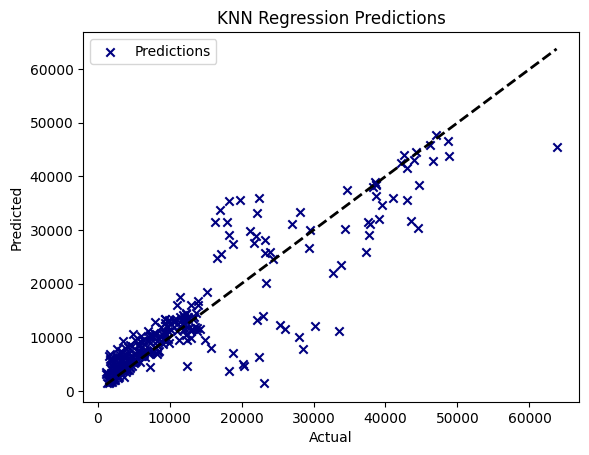

In [188]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot actual values (y_test) and predicted values (y_pred_knn)
ax.scatter(y_test, y_pred_knn, color='navy', label='Predictions', marker='x')

# Plot the line of equality (y = y_pred), showing the perfect prediction line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set title and axis labels
ax.set_title('KNN Regression Predictions')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Show legend
ax.legend()

# Display the plot
plt.show()

The x-axis shows the actual insurance charges, and the y-axis shows the predicted values from the KNN model.
The dashed line represents a perfect prediction line where actual values equals to predicted values.

The pattern suggests that KNN did well, though there are some outliers where it misses the actual values by a large margin, particularly in the higher cost range.

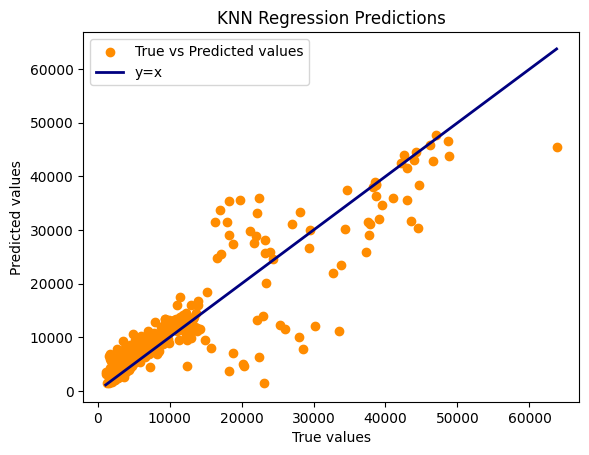

In [189]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot actual (true) values vs. predicted values
ax.scatter(y_test, y_pred_knn, color='darkorange', label='True vs Predicted values')

# Plot the line of equality (y = x), showing perfect predictions
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, label='y=x')

# Set title and axis labels
ax.set_title('KNN Regression Predictions')
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')

# Display the legend and plot
ax.legend()
plt.show()

#Experiment with Different Values of K and Visualize the Results
We can experiment with different values of K to see how the performance changes and visualize the predictions for different values of K.


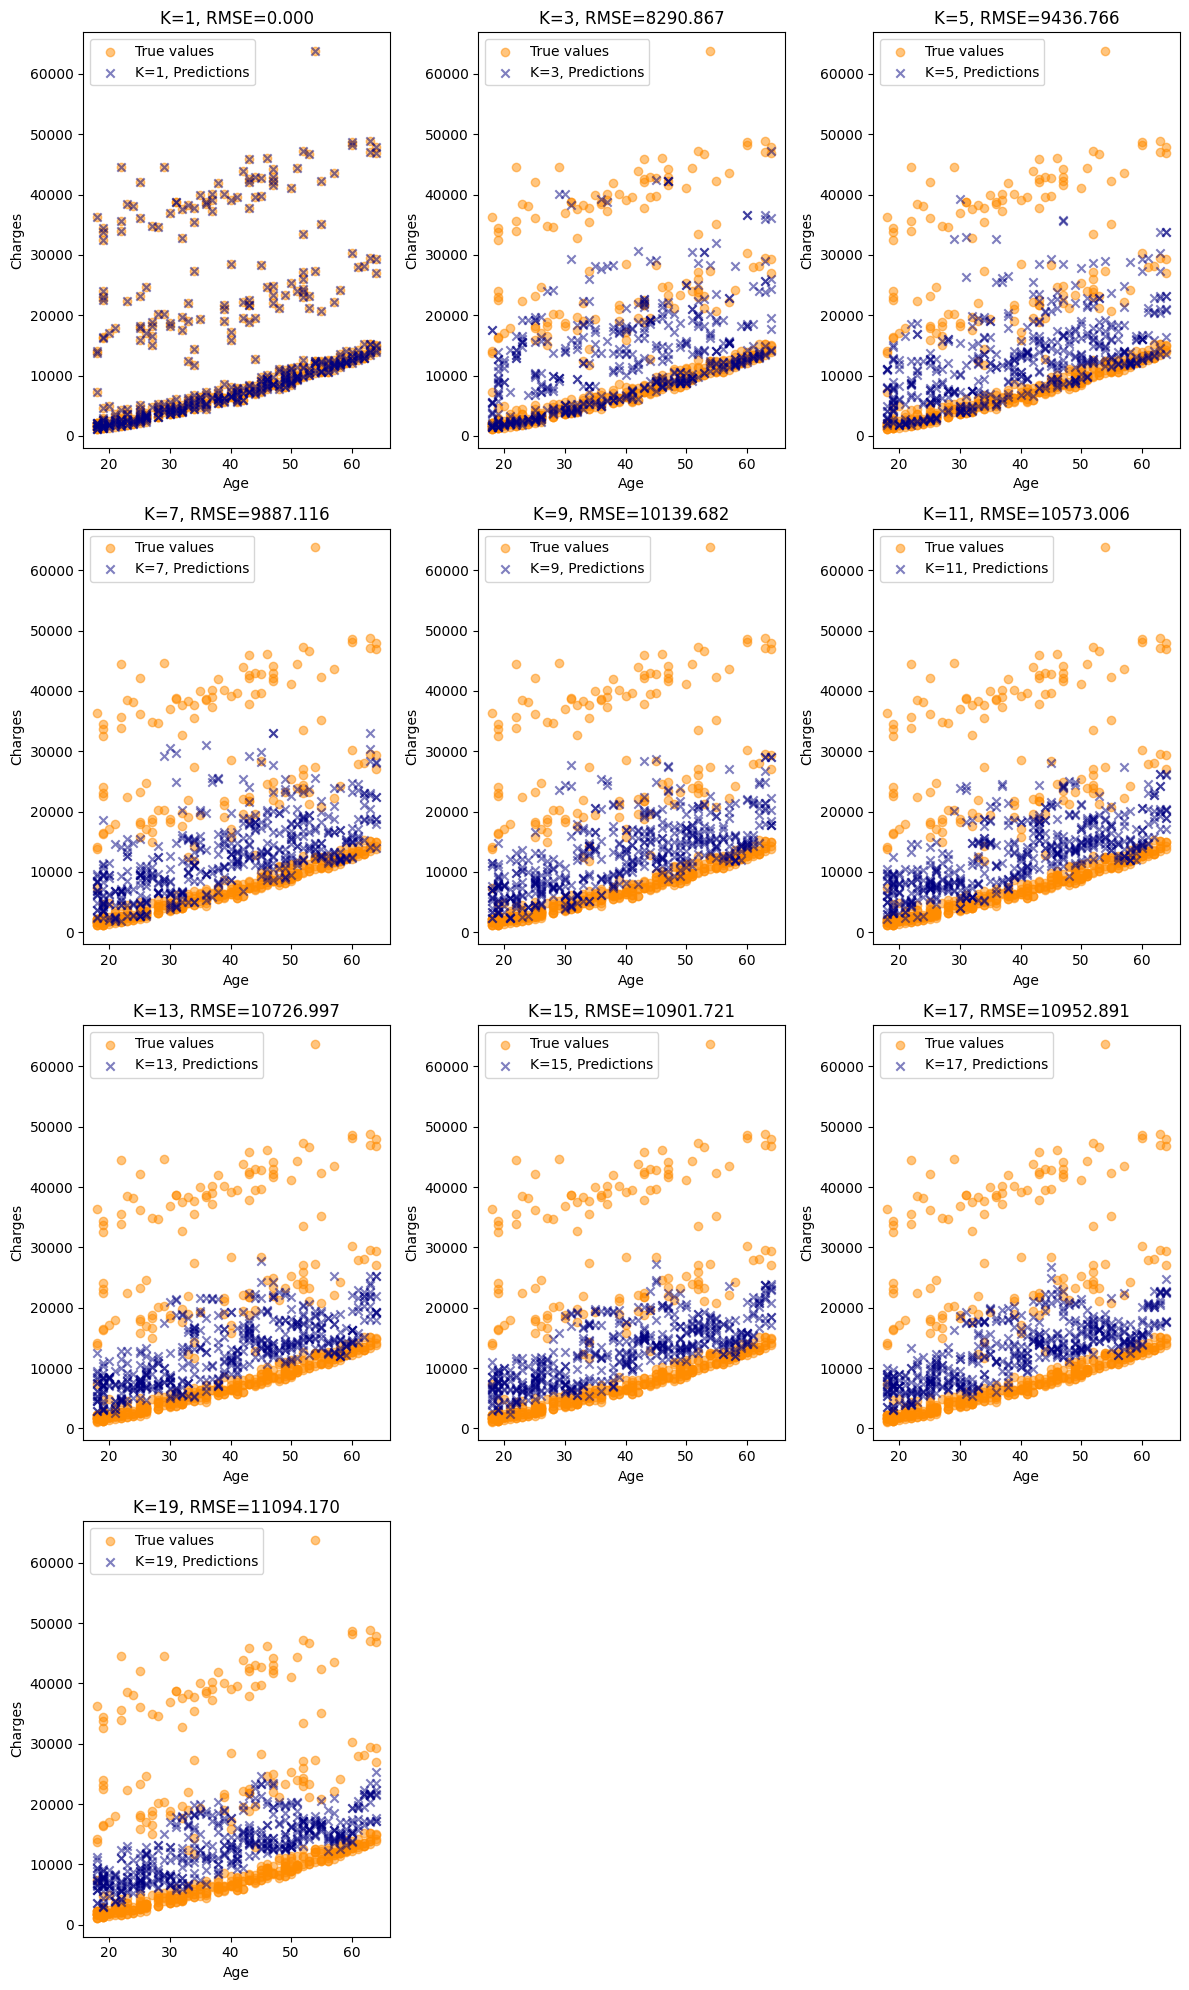

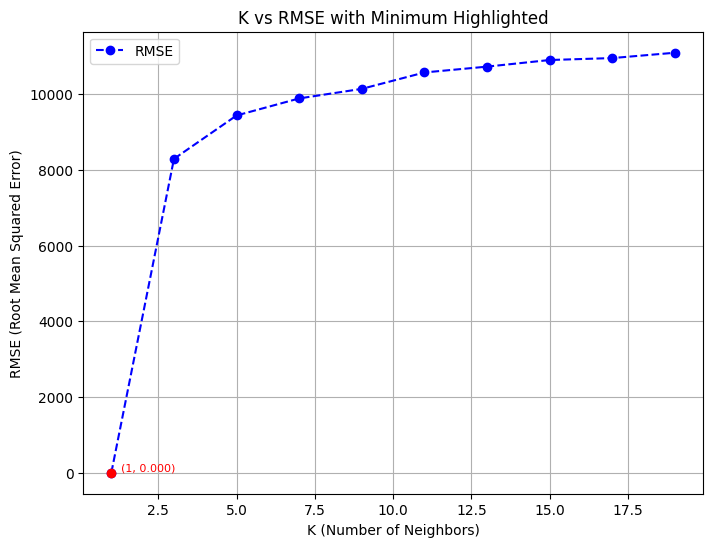

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Define sample size for plotting (use a smaller sample to avoid clutter)
sample_size = min(500, len(X))  # Adjust as needed
X_sample = X.sample(n=sample_size, random_state=42)
y_sample = y.loc[X_sample.index]

# RMSE values and K values
rmse_values = []
k_values = list(range(1, 21, 2))  # Example range of K values, adjust as needed
num_cols = 3  # Number of columns for subplot

plt.figure(figsize=(12, 20))  # Adjusted figure size
# Plotting predictions for different values of K
for i, K in enumerate(k_values, start=1):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_sample, y_sample)
    y_pred = knn.predict(X_sample)
    mse = mean_squared_error(y_sample, y_pred)
    rmse = np.sqrt(mse)
    rmse_values.append(rmse)
    
    # Subplot for each K's predictions
    plt.subplot(len(k_values)//num_cols + (len(k_values) % num_cols > 0), num_cols, i)
    plt.scatter(X_sample['age'], y_sample, color='darkorange', label='True values', alpha=0.5)
    plt.scatter(X_sample['age'], y_pred, color='navy', label=f'K={K}, Predictions', marker='x', alpha=0.5)
    plt.title(f'K={K}, RMSE={rmse:.3f}')
    plt.xlabel('Age')  # Example feature for x-axis
    plt.ylabel('Charges')
    plt.legend()

plt.tight_layout()
plt.show()

# Find the K with the lowest RMSE
min_rmse = min(rmse_values)
min_k = k_values[rmse_values.index(min_rmse)]

# Create the RMSE vs K plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='--', color='b', label='RMSE')

# Highlight the minimum RMSE point
plt.scatter(min_k, min_rmse, color='red', zorder=5)

# Offset the text position to avoid overlap with the point and line
plt.text(min_k + 0.3, min_rmse - 0.01, f'({min_k}, {min_rmse:.3f})', fontsize=8, ha='left', va='bottom', color='red')

# Labeling
plt.title("K vs RMSE with Minimum Highlighted", fontsize=12)
plt.xlabel("K (Number of Neighbors)", fontsize=10)
plt.ylabel("RMSE (Root Mean Squared Error)", fontsize=10)
plt.grid(True)
plt.legend()

# Show plot
plt.show()

Effect of K on Model Performance:
Small K values (e.g., K=1) may lead to overfitting. In this case, the model is sensitive to noise in the data, as it closely fits individual points. While the model might perform well on the training data, it can generalize poorly to unseen data.
   - Larger K values(e.g., K=10 or higher) tend to provide a smoother prediction by averaging over more neighbors. This reduces the risk of overfitting but can lead to underfitting if K is too large, causing the model to lose important local details in the 
 Evaluating Performance with RMSE:
   - We used Root Mean Squared Error (RMSE) as the primary evaluation metric in this notebook. RMSE is a commonly used measure of prediction error for regression models, as it provides an easily interpretable value in the same units as the target variable.
   - By plotting the RMSE for various values of K, we identified the K that minimized RMSE, providing the best fit for the data.


# 3 Linear Regression Model Development

In [159]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

In [160]:
# Linear Regression model
lr = LinearRegression() #creates instance of the model
lr.fit(X_train_scaled, y_train) #learns the relationship between the features and the target 

LinearRegression()

In [161]:
# Predict and evaluate
y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 5796.284659276275


An RMSE of almost 5796 was obtained from the linear regression model, indicating the average deviation between the model's predictions and the actual insurance charges.

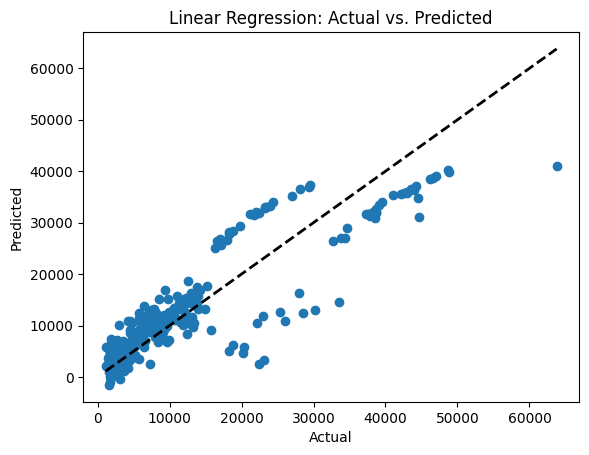

In [162]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

Patterns indicate that the model performs well at charging prediction, but underpredicts for high values while charging at bigger amounts.
Some points deviate significantly from the dashed line, indicating prediction errors, especially for higher charge values

**performance comparision of the Linear Regression model with KNN. Both models are close in performance, But KNN has a slight edge in accuracy (5594.32) , possibly due to its flexibility in modeling more complex, non-linear relationships within the data. However, linear regression remains simpler and more interpretable(5796.28), making it useful in cases where understanding feature influence is important.

# 4 Linear Regression with Feature Transformation

## Fit KNN Model with Hyperparameter Tuning

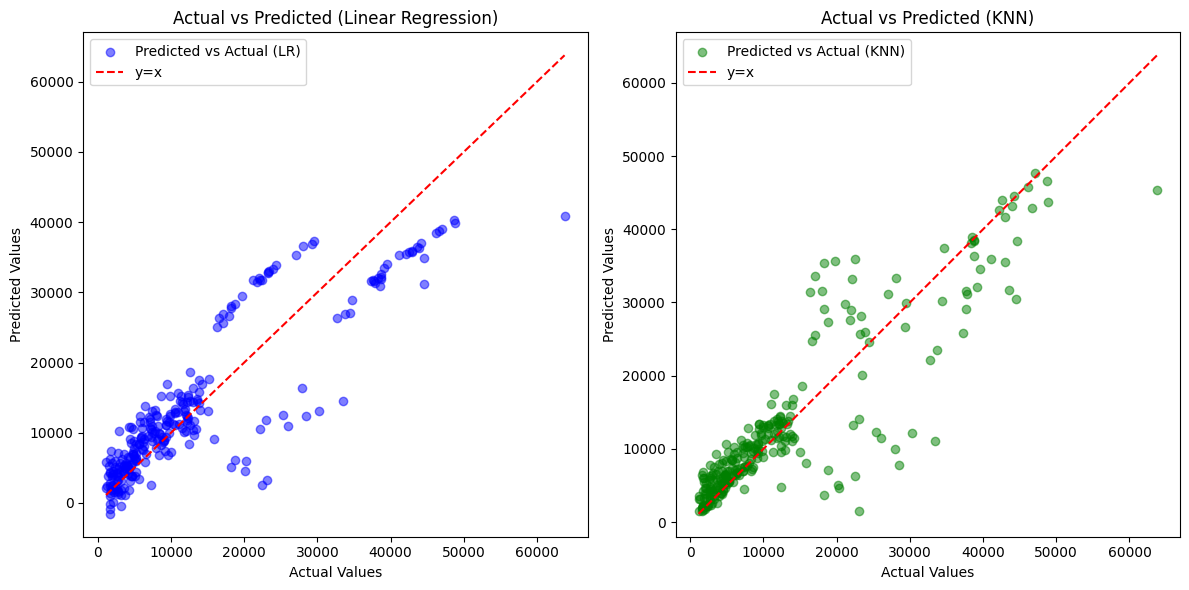

In [163]:
# Create a figure and axis object with specific size
plt.figure(figsize=(12, 6))

# Plot Actual vs Predicted values for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Predicted vs Actual (LR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot Actual vs Predicted values for KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='Predicted vs Actual (KNN)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')
plt.title('Actual vs Predicted (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Adjust layout to fit plots neatly
plt.tight_layout()
plt.show()

Linear Regression (Transformed) RMSE on test data: 13430.4059


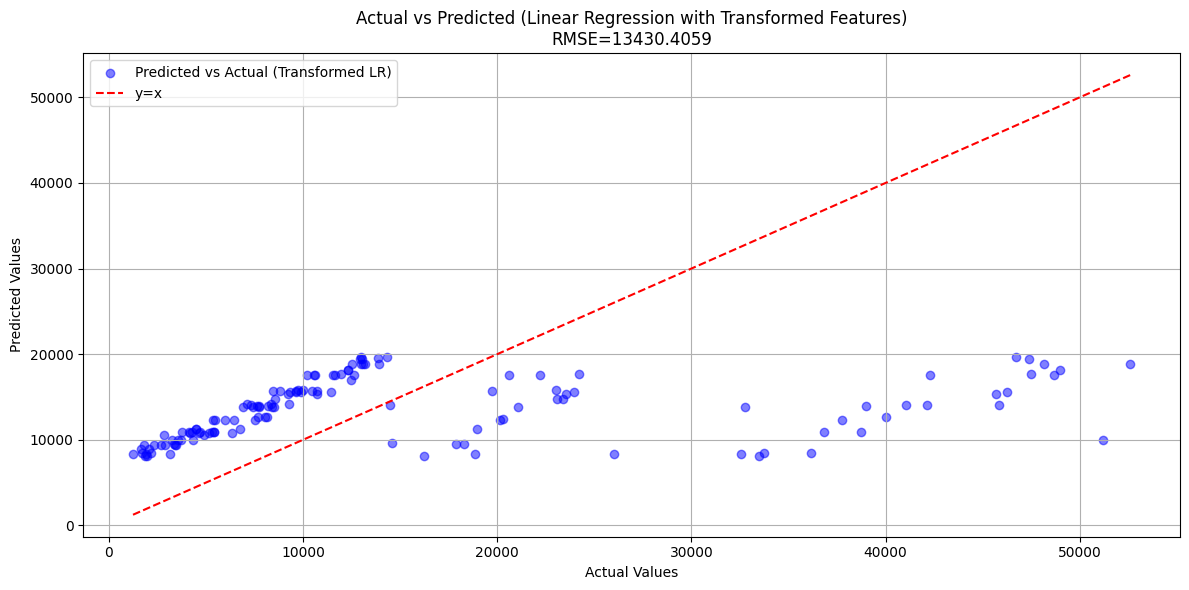

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.1, random_state=0)

# Initialize the Linear Regression model
linear_reg_transformed = LinearRegression()

# Train the model
linear_reg_transformed.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr_transformed = linear_reg_transformed.predict(X_test)

# Calculate the RMSE
rmse_lr_transformed = np.sqrt(mean_squared_error(y_test, y_pred_lr_transformed))
print(f'Linear Regression (Transformed) RMSE on test data: {rmse_lr_transformed:.4f}')
# Create a figure and axis object with specific size
plt.figure(figsize=(12, 6))

# Plot Actual vs Predicted values for Linear Regression (Transformed)
plt.scatter(y_test, y_pred_lr_transformed, alpha=0.5, color='blue', label='Predicted vs Actual (Transformed LR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')
plt.title(f'Actual vs Predicted (Linear Regression with Transformed Features)\nRMSE={rmse_lr_transformed:.4f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

####Using Polynomail Feature Transformation

In [190]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures

In [191]:
# Apply polynomial transformation to the features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

It will generate polynomial and interaction features up to the second degree.

fit_transform is called on the scaled training data (X_train_scaled). This method:
Fits the polynomial features to X_train_scaled.
Transforms the data into a new feature set that includes the original features, their squares, and their pairwise products (interactions).

In [192]:
# Train Linear Regression on transformed features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [193]:
# Predict and evaluate
y_pred_lr_poly = lr_poly.predict(X_test_poly)
rmse_lr_poly = np.sqrt(mean_squared_error(y_test, y_pred_lr_poly))
print(f"RMSE for Polynomial Linear Regression: {rmse_lr_poly}")

RMSE for Polynomial Linear Regression: 4550.093655895362


This indicates the average difference between the predicted and actual values, with a lower RMSE generally signifying better prediction accuracy.

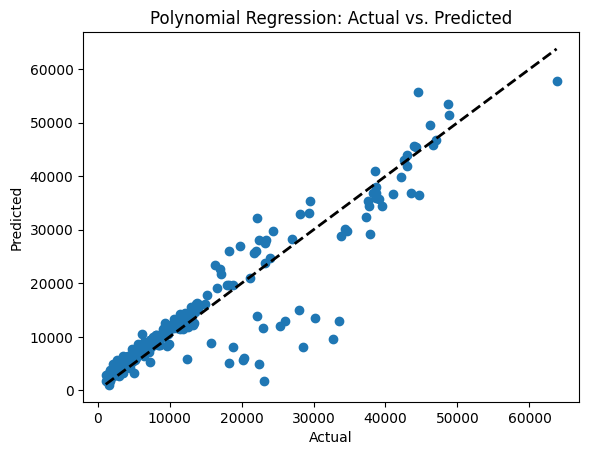

In [194]:
# Plot actual vs. predicted values for polynomial regression
plt.scatter(y_test, y_pred_lr_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.show()

This scatter plot shows the relationship between actual and predicted values from Polynomial Regression model. Points near the diagonal dashed line represent accurate predictions, where the model’s output closely matches the real data. A large portion of the points is concentrated around this line, reflecting decent model performance, though some points are more widely dispersed, indicating larger prediction errors for those specific cases.

# 5 Evaluation and Reflection

In [113]:
# Compare RMSE of all models
print(f"KNN RMSE: {rmse_knn}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Polynomial Regression RMSE: {rmse_lr_poly}")

KNN RMSE: 5594.315088879729
Linear Regression RMSE: 5796.284659276275
Polynomial Regression RMSE: 4550.093655895362


detailed discussion of which model performed best and why

K-Nearest Neighbors (KNN), Linear Regression, and Polynomial Linear Regression were the three models we assessed for this assignment.
Performance summary:
K-Nearest Neighbors (KNN): RMSE = 5594.315088879729
Linear Regression: RMSE =5796.284659276275
Polynomial Regression (degree=2): RMSE =  4550.093655895362

Hence, The polynomial regression degree 2 has low RMSE when compared to K nearset neighbour and linear regression. Therefore, Polynomial regression with degree 2(RMSE= 4550.093655895362) is the best performing model.

By adding squared terms to the features, this model was able to better fit the dataset and capture non-linear correlations. This shows that there may be innate non-linear relationships in the dataset between characteristics such as age, BMI, and insurance costs.


strengths and weaknesses of both KNN and Linear Regression models

K-Nearest Neighbors:
Strengths: Excellent handling of non-linear relationships; no assumptions about the data.
Adaptable and conceptually simple to grasp.
Weaknesses: Needs feature scaling and is sensitive to the choice of K.
costly to compute and harder to understand because it depends on distances without distinct model coefficients.

Linear regression:
Strengths: Easy to understand, with distinct coefficients illustrating the relative importance of each element and straightforward assumptions.
Minimal computational expense and effective for sizable datasets.
Weaknesses: Takes non-linear relationships poorly, assumes linearity, and is outlier sensitive.
less adaptable and more likely to underfit in non-linear connections.

In [ ]:
# Conclusion

 we compared two models for fitting the provided dataset: Linear Regression and K-Nearest Neighbors (KNN).

### Key Results:
*Linear Regression assumes a linear relationship between the input feature and the target, but often requires feature engineering which requires you to know (have a theory of) the underlying relationsnip (which is not always possible)
 
KNN makes no assumptions about the underlying relationship, using the nearest neighbors to make predictions. KNN has a tendency to overfit the training data, 
so its important to tune the model using validation data, and measure the performance on the test data.
### Final Thoughts:

KNN tuning: The choice of K should be made based on the dataset and the specific problem. Cross-validation is often recommended to find the optimal K value, particularly for datasets with varying levels of noise.